In [26]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from IPython.display import HTML

## 산점도 응용예제1 - 표본상관계수

### 예제소개

`-` 아래와 같은 자료를 수집하였다고 하자.

- 몸무게 = [44,48,49,58,62,68,69,70,76,79]
- 키 = [159,160,162,165,167,162,165,175,165,172]


In [3]:
x=[44,48,49,58,62,68,69,70,76,79]
y=[159,160,162,165,167,162,165,175,165,172]

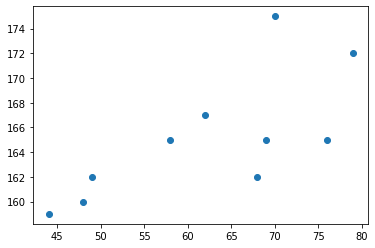

In [4]:
plt.plot(x,y,'o')

- 키가 큰 사람일수록 몸무게도 많이 나간다. (반대도 성립)
- 키와 몸무게는 관계가 있어 보인다. (정비례)

`-` 얼만큼 정비례인가?

- 이 질문에 대답하기 위해서는 상관계수의 개념을 알아야 한다.
- 상관계수는 산점도에서 가장 중요한 개념 중 하나

### 상관계수의 정의

`-` (표본) 상관계수

$$r=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y}) }{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2\sum_{i=1}^{n}(y_i-\bar{y})^2 }}=\sum_{i=1}^{n}\tilde{x}_i\tilde{y}_i $$


- 단, $\tilde{x}_i=\frac{(x_i-\bar{x})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}}$, $\tilde{y}_i=\frac{(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}$

`-` $\tilde{x}_i$와 $\tilde{y}_i$를 계산하기 위해서 $a=\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}, b=\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}$를 계산하자. 

(방법1)

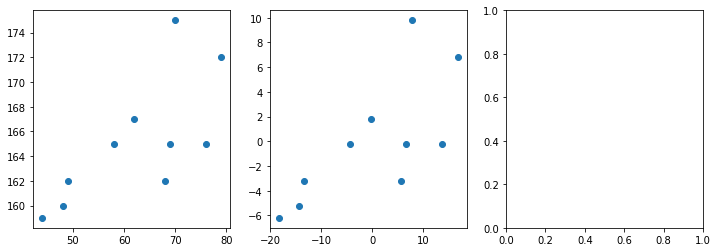

In [20]:
fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].plot(x,y,'o')
ax[1].plot(np.array(x) - np.mean(x), np.array(y)-np.mean(y), 'o')

In [21]:
xx= (np.array(x) - np.mean(x)) / np.sqrt(np.sum((x-np.mean(x))**2))
yy= (np.array(y) - np.mean(y)) / np.sqrt(np.sum((y-np.mean(y))**2))

In [22]:
ax[2].plot(xx,yy,'o')

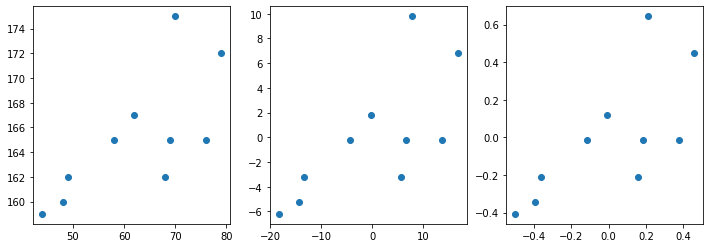

In [23]:
fig

첫번째 그림에서 두번쨰 그림 갈때 0근처로 감

두번째 그림에서 세번째 그림은 퍼져있는 정도(분산)이 큰 차이가 없음(1근처로 왔다갔다..)

(방법2)

`-` 사실 $a,b$는 아래와 같이 계산할 수 있다.

$a=\sqrt{n}\times{\tt np.std(x)}$ 

$b=\sqrt{n}\times{\tt np.std(y)}$ 

In [29]:
n=len(x)
np.sqrt(n)*np.std(x), np.sqrt(n)*np.std(y)

(36.58004920718397, 15.21840990379744)

- ${\tt np.std(x)}=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(x_i-\bar{x})^2}$
- ${\tt np.std(y)}=\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\bar{y})^2}$

> note: ${\tt np.std(x,ddof=1)}=\sqrt{\frac{1}{n-1}\sum_{i=1}^{n}(x_i-\bar{x})^2}$

In [30]:
# xx= (x-np.mean(x))/a
# yy= (y-np.mean(y))/b
# ax3.plot(xx,yy,'o')

### 상관계수의 의미

***질문: r의 값이 양수인가? 음수인가?***

양수 일 것 같다..

`-` plotly 사용하여 $(\tilde{x}_i,\tilde{y}_i)$를 그려보자. 

In [27]:
fig=px.scatter(x=xx, y=yy)
HTML(fig.to_html(include_plotlyjs='cdn',include_mathjax=False))

- $\tilde{x}_i$, $\tilde{y}_i$ 를 곱한값이 양수인것과 음수인것을 체크해보자. 
- 양수인쪽이 많은지 음수인쪽이 많은지 생각해보자. 
- $r=\sum_{i=1}^{n}\tilde{x}_i \tilde{y}_i$ 의 부호는? 

### 그림을 보고 상관계수의 부호를 알아내는 방법

`-` $(x_i,y_i)$의 산점도를 보고 $(\tilde{x}_i, \tilde{y}_i)$ 의 산점도를 상상 $\to$ 1,3 분면에 점들이 많으면 양수, 2,4 분면에 점들이 많으면 음수 

### 그림을 보고 상관계수의 절대값을 알아내는 방법

`-` 예시

In [47]:
x=np.arange(0,10,0.1)
y1=x+np.random.normal(loc=0,scale=1.0,size=len(x)) # 평균0,분산1인 오차항 더하기
y2=x+np.random.normal(loc=0,scale=7.0,size=len(x)) # 평균0, 분산7인 오차항 더하기

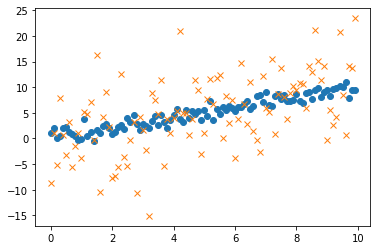

In [48]:
plt.plot(x,y1,'o')
plt.plot(x,y2,'x')

In [49]:
def tilde(x):
    n=len(x)
    return (np.array(x) - np.mean(x)) / np.sqrt(np.sum((np.array(x) - np.mean(x))**2))

In [50]:
xx = tilde(x)
yy1 = tilde(y1)
yy2 = tilde(y2)

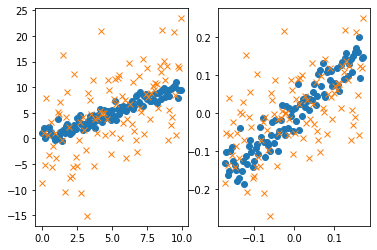

In [51]:
fig, ax = plt.subplots(1,2)
ax[0].plot(x,y1,'o');ax[0].plot(x,y2,'x')
ax[1].plot(xx,yy1,'o');ax[1].plot(xx,yy2,'x')

## 산점도 응용예제2 -- 앤스콤의 4분할

`-` Anscombe's quartet: 교과서에 나오는 그림임. 

`-` 교훈1: 데이터를 분석하기 전에 항상 시각화를 하라. 

In [52]:
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

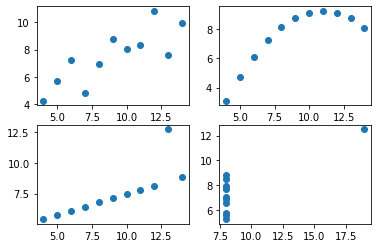

In [53]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
ax1.plot(x,y1,'o') 
ax2.plot(x,y2,'o') 
ax3.plot(x,y3,'o')  
ax4.plot(x4,y4,'o') 

In [55]:
_xx = tilde(x)
_yy1 = tilde(y1)

In [57]:
np.sum(_xx*_yy1) # 상관계수 계싼

0.8164205163448399

In [60]:
np.corrcoef([x,y1]) # 상관계수 계산

array([[1.        , 0.81642052],
       [0.81642052, 1.        ]])

In [61]:
np.corrcoef([x,y2])

array([[1.        , 0.81623651],
       [0.81623651, 1.        ]])

In [64]:
np.corrcoef([x,y1,y2,y3])

array([[1.        , 0.81642052, 0.81623651, 0.81628674],
       [0.81642052, 1.        , 0.7500054 , 0.46871668],
       [0.81623651, 0.7500054 , 1.        , 0.58791933],
       [0.81628674, 0.46871668, 0.58791933, 1.        ]])

In [63]:
np.corrcoef([x4,y4])

array([[1.        , 0.81652144],
       [0.81652144, 1.        ]])

- 앤스콤의 4분할중 1,2,3 번째 그림의 상관계수는 0.81642052, 0.81623651, 0.81628674 이라는 의미 
- 즉 corr(x,y1)=0.81642052, corr(x,y2)=0.81623651, corr(x,y3)=0.81628674 임 

`*` 참고로 np.corrcoef([x,y1,y2,y3])의 계산결과는 정확하게 

$$\begin{bmatrix} corr(x,x) & corr(x,y1) & corr(x,y2) & corr(x,y3) \\ corr(y1,x) & corr(y1,y1) & corr(y1,y2) & corr(y1,y3) \\ corr(y2,x) & corr(y2,y1) & corr(y2,y2) & corr(y2,y3) \\ corr(y3,x) & corr(y3,y1) & corr(y3,y2) & corr(y3,y3)\end{bmatrix}$$

를 의미한다.

`-` 앤스콤플랏의 4개의 그림은 모두 같은 상관계수를 가진다. $\to$ 하지만 4개의 그림은 느낌이 전혀 다르다. 

`-` 같은 표본상관계수를 가진다고 하여 같은 관계성을 가지는 것은 아니다. 표본상관계수는 x,y의 비례정도를 측정하는데 그 값이 1에 가깝다고 하여 꼭 정비례의 관계가 있음을 의미하는게 아니다. $(x_i,y_i)$의 산점도가 선형성을 보일때만 "표본상관계수가 1이므로 정비례의 관계에 있다" 라는 논리전개가 성립한다. 

- 앤스콤의 1번째 플랏: 산점도가 선형 $\to$ 표본상관계수가 0.816 = 정비례의 관계가 0.816 정도 
- 앤스콤의 2번째 플랏: 산점도가 선형이 아님 $\to$ 표본상관계수가 크게 의미없음 
- 앤스콤의 3번째 플랏: 산점도가 선형인듯 보이나 하나의 이상치가 있음 $\to$ 하나의 이상치가 표본상관계수의 값을 무너뜨릴 수 있으므로 표본상관계수값을 신뢰할 수 없음. 
- 앤스콤의 4번째 플랏: 산점도를 그려보니 이상한그림 $\to$ 표존상관계수를 계산할수는 있음. 그런데 그게 무슨 의미가 있을지? 

`-` 앤스콤의 3번째 플랏: 하나의 이상치가 상관계수를 무너뜨리는 경우 시각화 

## 산점도 응용예제3 -- 무상관은 관계가 없다는 뜻? 

In [65]:
np.random.seed(43052)
x=np.linspace(-1,1,100,endpoint=True)
y=x**2+np.random.normal(scale=0.1,size=100)

Text(0.5, 1.0, 'y=x**2')

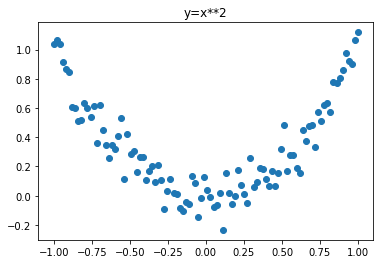

In [66]:
plt.plot(x,y,'o')
plt.title('y=x**2')

In [67]:
np.corrcoef(x,y)

array([[1.        , 0.00688718],
       [0.00688718, 1.        ]])

`-` 표본상관계수의 값이 0에 가까운 것은 두 변수의 직선관계가 약한것을 의미한 것이지 두 변수 사이에 아무런 함수관계가 없다는 것을 의미하는 것은 아니다. 